## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Downloading Data

I've tried to scrap the "https://www.pedestrian.melbourne.vic.gov.au/" url to find all data links but It seems like this is not the right url as it doesn't return the full html code. In order to solve this problem , I'll be following another way to get all the data rather than downloading it manually.

In [2]:
import datetime

In [3]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

text=''
df= pd.DataFrame()
base_url = 'https://www.pedestrian.melbourne.vic.gov.au/datadownload/'
previuos_month = datetime.now() - relativedelta(months=1)
while text !='January_2020':
  # Create string of month name and year...
  text = format(previuos_month,'%B_%Y')
  print(text)
  temp_df = pd.read_csv(base_url+text+'.csv')
  df = pd.concat([df,temp_df])
  previuos_month = previuos_month - relativedelta(months=1)

June_2024
May_2024
April_2024
March_2024
February_2024
January_2024
December_2023
November_2023
October_2023
September_2023
August_2023
July_2023
June_2023
May_2023
April_2023
March_2023
February_2023
January_2023
December_2022
November_2022
October_2022
September_2022
August_2022
July_2022
June_2022
May_2022
April_2022
March_2022
February_2022
January_2022
December_2021
November_2021
October_2021
September_2021
August_2021
July_2021
June_2021
May_2021
April_2021
March_2021
February_2021
January_2021
December_2020
November_2020
October_2020
September_2020
August_2020
July_2020
June_2020
May_2020
April_2020
March_2020
February_2020
January_2020


In [4]:
# Saving Dataframe
df.to_csv('pedestrian_data.csv')

## Mount to drive

I prefer saving my datasets into my drive and then read it directly rather than uploading it into colab.

In [5]:
from google.colab import drive
drive.mount('/content/Drive',force_remount = True)

## Read Dataset

In [8]:
df =pd.read_csv("/content/Drive/pedestrian_data.csv")

C:\Users\reemi\AppData\Local\Temp\ipykernel_30116\3620339921.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("pedestrian_data.csv")


In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'Hour', 'Bourke Street Mall (North)',
       'Bourke Street Mall (South)', 'Melbourne Central', 'Town Hall (West)',
       'Princes Bridge', 'Flinders Street Station Underpass', 'Birrarung Marr',
       ...
       '380 Elizabeth St', 'State Library - New',
       'Flinders Ln - Degraves St (South)',
       'Flinders Ln - Degraves St (North)',
       'Flinders Ln - Degraves St (Crossing)', 'Flinders St - ACMI',
       'Spring St - Flinders St (West)', 'Macaulay Rd - Bellair St',
       'Harbour Esplanade - Pedestrian Path', 'Harbour Esplanade - Bike Path'],
      dtype='object', length=102)

In [ ]:
df = df[['Date','Hour','Melbourne Central']].copy()
df.head()

,Date,Hour,Melbourne Central
0,01/10/2023,0,941
1,01/10/2023,1,683
2,01/10/2023,2,0
3,01/10/2023,3,779
4,01/10/2023,4,327


## Data Investigation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               33600 non-null  object
 1   Hour               33600 non-null  int64 
 2   Melbourne Central  33600 non-null  object
dtypes: int64(1), object(2)
memory usage: 787.6+ KB


I am seeing that Melbourne central column type is not int64 as expected. So, I'll be investigating its values that are not of type int64.

In [ ]:
obj_values =[i for i in df['Melbourne Central'].unique() if isinstance(i,int) ==False]
print(obj_values)

['461', '653', '846', '1105', '1532', '1531', '1551', '1405', '1511', '1814', '1813', '1550', '1391', '1187', '625', '381', '247', '79', '32', '22', '25', '51', '148', '224', '623', '647', '704', '933', '1473', '1735', '1534', '1378', '1671', '1641', '1510', '1544', '1474', '1169', '818', '541', '192', '105', '44', '50', '30', '48', '141', '237', '602', '624', '1080', '1608', '1663', '1700', '1729', '1963', '2022', '1820', '1730', '1562', '1101', '639', '303', '132', '80', '31', '27', '49', '180', '246', '600', '586', '723', '1147', '1603', '1647', '1549', '1575', '1654', '1659', '1708', '1583', '1462', '1162', '332', '178', '104', '78', '47', '153', '286', '438', '618', '789', '1045', '1585', '1885', '1744', '2199', '2304', '2256', '2119', '2164', '1845', '1320', '951', '585', '270', '220', '90', '86', '106', '250', '527', '875', '1460', '2045', '2485', '2617', '2682', '2600', '2464', '2492', '2592', '2760', '2271', '1958', '1194', '658', '572', '299', '230', '85', '91', '119', '197',

It contains numbers in the form of string that why it's type not int64 as It contains mixed datatypes.

In [ ]:
def to_int(x):
  try:
    return int(x)
  except:
    return np.nan

df['Melbourne Central']=df['Melbourne Central'].apply(to_int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               33600 non-null  object 
 1   Hour               33600 non-null  int64  
 2   Melbourne Central  32772 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 787.6+ KB


In [ ]:
df.describe()

,Hour,Melbourne Central
count,33600.00000,32772.000000
mean,11.50000,739.766050
std,6.92229,765.203506
min,0.00000,-1.000000
25%,5.75000,110.000000
50%,11.50000,418.000000
75%,17.25000,1240.000000
max,23.00000,4689.000000


Melbourne Central column can't have negative values.

In [ ]:
idx = df[df['Melbourne Central']<=0].index
df.iloc[idx,2] = np.nan

Now, I'll Date column to datetime.

Date column contains different date formats that we need to parse first.<br>
Ex: 07/10/2023 , 7/10/23 , 31-Jan-13

In [ ]:
df['Date']

0        01/10/2023
1        01/10/2023
2        01/10/2023
3        01/10/2023
4        01/10/2023
            ...    
33595    31/01/2020
33596    31/01/2020
33597    31/01/2020
33598    31/01/2020
33599    31/01/2020
Name: Date, Length: 33600, dtype: object

In [ ]:
obj_values =[i for i in df['Date'].unique() if isinstance(i,float) ==True]
print(obj_values)

[]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               33600 non-null  object 
 1   Hour               33600 non-null  int64  
 2   Melbourne Central  32524 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 787.6+ KB


### Handling Date column

In [ ]:
from dateutil import parser

date1 = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

date2 = df.iloc[date1[date1.isna()].index]['Date'].apply(parser.parse)
date2 =pd.to_datetime(date2,  format='%Y-%m-%d')
date2 = date2.dropna().dt.strftime('%d/%m/%Y')
if len(date1[date1.isna()]) == len(date2):
  df['Date'] = date1.fillna(date2)

df['Date']

0       2023-10-01
1       2023-10-01
2       2023-10-01
3       2023-10-01
4       2023-10-01
           ...    
33595   2020-01-31
33596   2020-01-31
33597   2020-01-31
33598   2020-01-31
33599   2020-01-31
Name: Date, Length: 33600, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               33600 non-null  datetime64[ns]
 1   Hour               33600 non-null  int64         
 2   Melbourne Central  32524 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 787.6 KB


In [ ]:
df['Date']=df['Date'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               33600 non-null  object 
 1   Hour               33600 non-null  int64  
 2   Melbourne Central  32524 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 787.6+ KB


#### Handling hour column

In [ ]:
df['Hour'] = df['Hour'].apply(lambda x:'{:02d}'.format(x)+":00:00")
df['Date'] = df['Date'] + ' ' + df['Hour']
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['Date']

0       2023-10-01 00:00:00
1       2023-10-01 01:00:00
2       2023-10-01 02:00:00
3       2023-10-01 03:00:00
4       2023-10-01 04:00:00
                ...        
33595   2020-01-31 19:00:00
33596   2020-01-31 20:00:00
33597   2020-01-31 21:00:00
33598   2020-01-31 22:00:00
33599   2020-01-31 23:00:00
Name: Date, Length: 33600, dtype: datetime64[ns]

### Adding column day , month , season , holiday

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

Defining Holiday and Season columns for EDA later

In [ ]:
def holiday(x):
  if x in ['Saturday','Sunday']:
    return True
  else:
    return False

def season(x):
  if x in [12,1,2]:
    return 'Summer'
  elif x in [3,4,5]:
    return 'Autumn'
  elif x in [6,7,8]:
    return 'Winter'
  else:
    return 'Spring'

In [ ]:
df['Season'] = df['Month'].apply(season)
df['Holiday'] = df['Month'].apply(holiday)

checking the distribution of our target column

<Axes: ylabel='Density'>

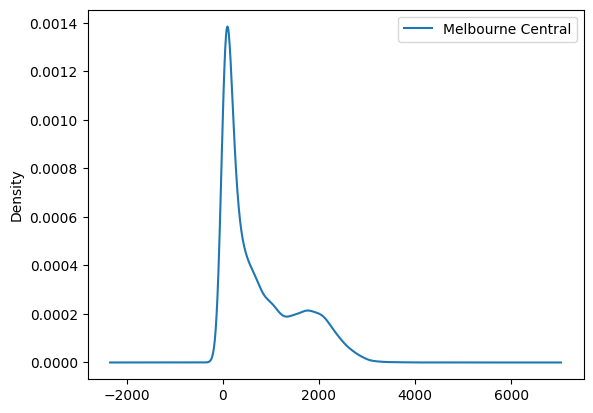

In [ ]:
df[['Melbourne Central']].plot.kde()

Checking outliers

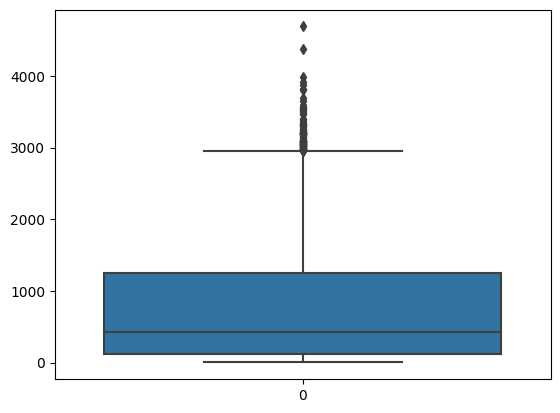

In [ ]:
plt.figure()
sns.boxplot(df['Melbourne Central'])
plt.show()

### Handling Outliers

In [ ]:
outlier_indices = df[df['Melbourne Central']>3000].index
df.iloc[outlier_indices,2] = np.nan

## Handling Missing values

In [ ]:
df.isna().sum() / len(df) *100

Date                 0.000000
Hour                 0.000000
Melbourne Central    3.443452
DayOfWeek            0.000000
Month                0.000000
Year                 0.000000
Season               0.000000
Holiday              0.000000
dtype: float64

I will choose to drop these rows for two reasons: <br>
1. Data is not small.
2. Melbourne Central column is the most important column so its values are critical and I prefer not to change in it to avoid being biased.

In [ ]:
null_rows = df[df['Melbourne Central'].isna()].index
df.drop(null_rows , inplace=True)

In [ ]:
print(df.isna().sum())
df.reset_index(inplace=True, drop=True)

Date                 0
Hour                 0
Melbourne Central    0
DayOfWeek            0
Month                0
Year                 0
Season               0
Holiday              0
dtype: int64


In [ ]:
df.tail()

,Date,Hour,Melbourne Central,DayOfWeek,Month,Year,Season,Holiday
32438,2020-01-31 19:00:00,19:00:00,1739.0,Friday,1,2020,Summer,False
32439,2020-01-31 20:00:00,20:00:00,1568.0,Friday,1,2020,Summer,False
32440,2020-01-31 21:00:00,21:00:00,1815.0,Friday,1,2020,Summer,False
32441,2020-01-31 22:00:00,22:00:00,1522.0,Friday,1,2020,Summer,False
32442,2020-01-31 23:00:00,23:00:00,1212.0,Friday,1,2020,Summer,False


At the end of this inverstigation, I'll sort the data based on the date and set it as index column.

In [ ]:
df.sort_values(by='Date',inplace=True)
df.set_index(pd.DatetimeIndex(df['Date']),inplace=True)
df.head()

,Date,Hour,Melbourne Central,DayOfWeek,Month,Year,Season,Holiday
Date,,,,,,,,
2020-01-01 02:00:00,2020-01-01 02:00:00,02:00:00,1897.0,Wednesday,1,2020,Summer,False
2020-01-01 03:00:00,2020-01-01 03:00:00,03:00:00,1161.0,Wednesday,1,2020,Summer,False
2020-01-01 04:00:00,2020-01-01 04:00:00,04:00:00,555.0,Wednesday,1,2020,Summer,False
2020-01-01 05:00:00,2020-01-01 05:00:00,05:00:00,321.0,Wednesday,1,2020,Summer,False
2020-01-01 06:00:00,2020-01-01 06:00:00,06:00:00,245.0,Wednesday,1,2020,Summer,False


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32443 entries, 2020-01-01 02:00:00 to 2023-10-31 23:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               32443 non-null  datetime64[ns]
 1   Hour               32443 non-null  object        
 2   Melbourne Central  32443 non-null  float64       
 3   DayOfWeek          32443 non-null  object        
 4   Month              32443 non-null  int64         
 5   Year               32443 non-null  int64         
 6   Season             32443 non-null  object        
 7   Holiday            32443 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Melbourne Central,Month,Year
count,32443.000000,32443.000000,32443.000000
mean,739.073698,6.364578,2021.452517
std,755.558486,3.307289,1.104374
min,1.000000,1.000000,2020.000000
25%,113.000000,4.000000,2020.000000
50%,425.000000,6.000000,2021.000000
75%,1240.000000,9.000000,2022.000000
max,2995.000000,12.000000,2023.000000


In [ ]:
df.groupby('DayOfWeek')['Melbourne Central'].agg(['mean','sum','count','min','max'])

,mean,sum,count,min,max
DayOfWeek,,,,,
Friday,813.047127,3778230.0,4647,1.0,2986.0
Monday,653.391051,3022587.0,4626,1.0,2925.0
Saturday,896.121718,4130225.0,4609,1.0,2995.0
Sunday,746.716392,3443856.0,4612,1.0,2967.0
Thursday,707.045542,3291297.0,4655,1.0,2951.0
Tuesday,663.379556,3076091.0,4637,1.0,2795.0
Wednesday,694.756710,3235482.0,4657,1.0,2829.0


### Line plot between date and pedestrian count in Melbourne Central

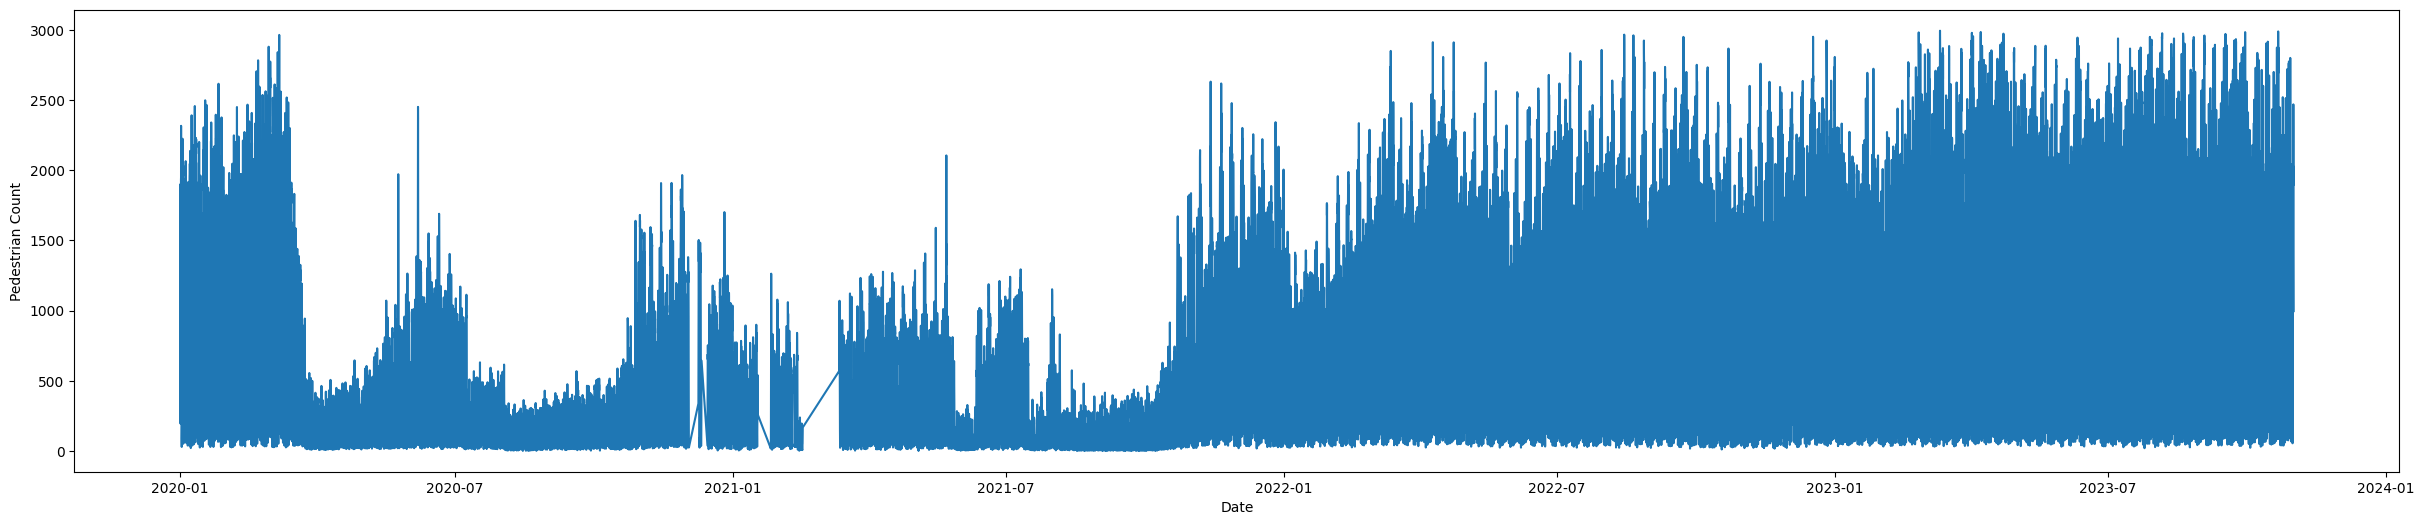

In [ ]:
plt.figure(figsize=[30,6])
plt.plot(df.index,df['Melbourne Central'])
plt.xlabel("Date")
plt.ylabel("Pedestrian Count")
plt.show()

From the previous plot, It seems like our data is not stationary

## Split Data

In [ ]:
df.head()

,Date,Hour,Melbourne Central,DayOfWeek,Month,Year,Season,Holiday
Date,,,,,,,,
2020-01-01 02:00:00,2020-01-01 02:00:00,02:00:00,1897.0,Wednesday,1,2020,Summer,False
2020-01-01 03:00:00,2020-01-01 03:00:00,03:00:00,1161.0,Wednesday,1,2020,Summer,False
2020-01-01 04:00:00,2020-01-01 04:00:00,04:00:00,555.0,Wednesday,1,2020,Summer,False
2020-01-01 05:00:00,2020-01-01 05:00:00,05:00:00,321.0,Wednesday,1,2020,Summer,False
2020-01-01 06:00:00,2020-01-01 06:00:00,06:00:00,245.0,Wednesday,1,2020,Summer,False


In [ ]:
df.tail()

,Date,Hour,Melbourne Central,DayOfWeek,Month,Year,Season,Holiday
Date,,,,,,,,
2023-10-31 19:00:00,2023-10-31 19:00:00,19:00:00,2110.0,Tuesday,10,2023,Spring,False
2023-10-31 20:00:00,2023-10-31 20:00:00,20:00:00,1824.0,Tuesday,10,2023,Spring,False
2023-10-31 21:00:00,2023-10-31 21:00:00,21:00:00,1447.0,Tuesday,10,2023,Spring,False
2023-10-31 22:00:00,2023-10-31 22:00:00,22:00:00,1147.0,Tuesday,10,2023,Spring,False
2023-10-31 23:00:00,2023-10-31 23:00:00,23:00:00,996.0,Tuesday,10,2023,Spring,False


In [ ]:
ts_train = df['Melbourne Central'].loc['2023-01-01':'2023-09-30'].copy()
ts_test = df['Melbourne Central'].loc[df.index >= '2023-10-01'].copy()

In [ ]:
ts_train.tail()

Date
2023-09-30 19:00:00    2633.0
2023-09-30 20:00:00    2456.0
2023-09-30 21:00:00    2178.0
2023-09-30 22:00:00    1635.0
2023-09-30 23:00:00    1210.0
Name: Melbourne Central, dtype: float64

In [ ]:
ts_test.head()

Date
2023-10-01 00:00:00    941.0
2023-10-01 01:00:00    683.0
2023-10-01 03:00:00    779.0
2023-10-01 04:00:00    327.0
2023-10-01 05:00:00    192.0
Name: Melbourne Central, dtype: float64

In [ ]:
print(f"Train size = {len(ts_train)}")
print(f"Test size = {len(ts_test)}")

Train size = 6504
Test size = 731


## Check If Data is Stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_adfuller(ts_df):
  # Check Mean and Std
  rolling_mean = ts_df.rolling(168).mean()
  rolling_std = ts_df.rolling(168).std()

  # Rolling plots
  plt.figure(figsize=[30,6])
  original_df = plt.plot(ts_df,color='blue' , label='Original Data')
  rolling_mean_plt = plt.plot(rolling_mean,color='red' , label='Rolling Mean')
  rolling_std_plt = plt.plot(rolling_std ,color='black' , label='Rolling Std')
  plt.legend()
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)


  # Ckech adfuller
  res = adfuller(ts_df, autolag="AIC")
  print("Test Statistic : ",res[0])
  print("P-value : ",res[1])
  print("#lags used : ",res[2])
  print("Number of observation used : ",res[3])
  for key, value in res[4].items():
    print(f"Critical Value {key} : {value}")

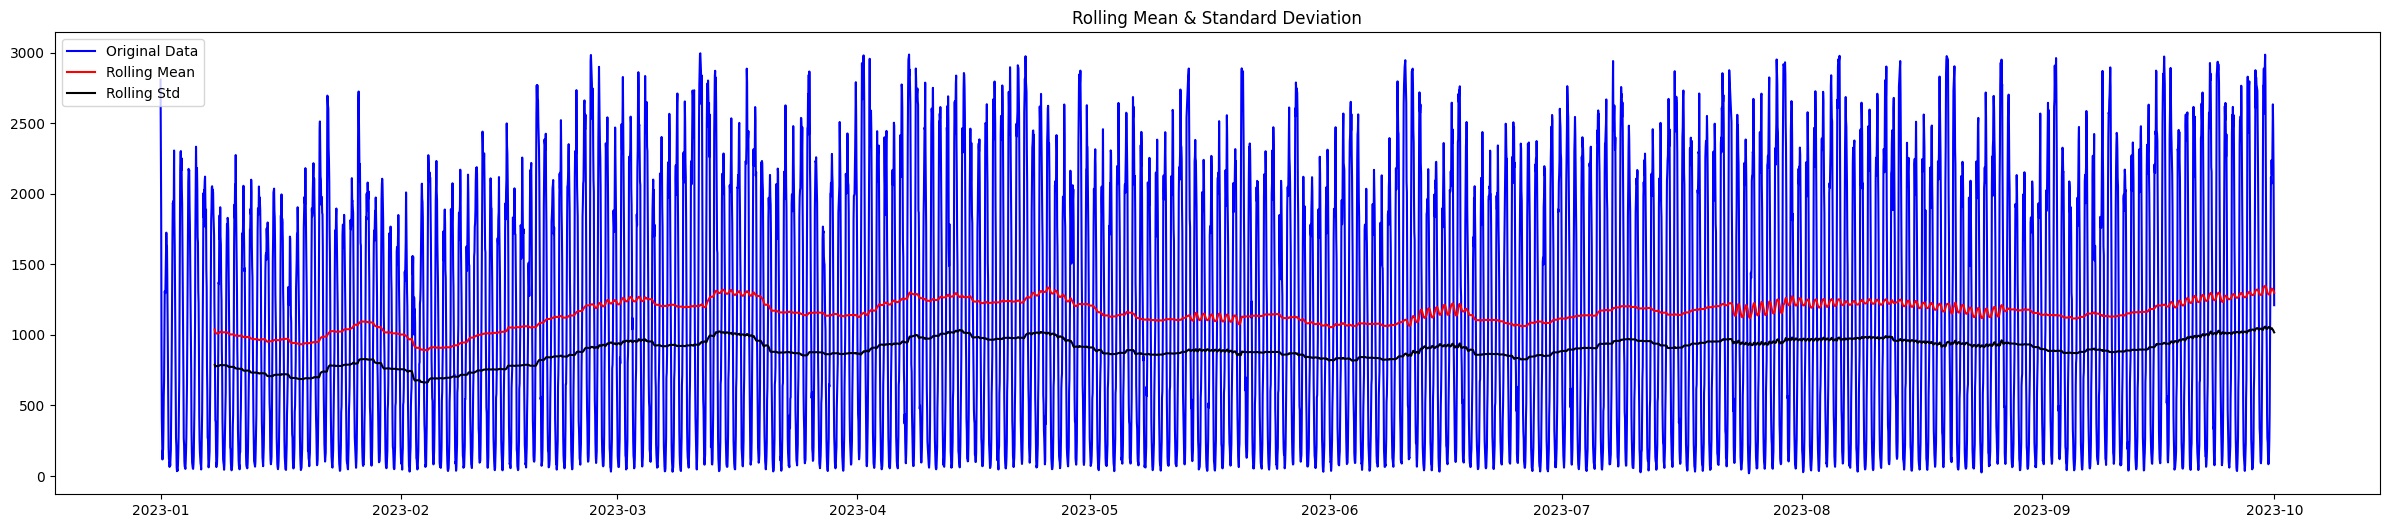

Test Statistic :  -8.405734602430018
P-value :  2.1702523128088524e-13
#lags used :  35
Number of observation used :  6468
Critical Value 1% : -3.4313614250366133
Critical Value 5% : -2.8619869628269003
Critical Value 10% : -2.567007915011116


In [ ]:
check_adfuller(ts_train)

from the grapg it seems that our data is stationary as: <br>
1. Mean seems constant.
2. Std seems constant.
3. It's not periodic.
4. Test Statistic is less than critical value.
5. p-value is less than 0.05 so we are going to reject the null hypothesis (Time series is stationary).

## ARIMA Model

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:

p is the number of autoregressive terms, <br>
d is the number of nonseasonal differences needed for stationarity, <br>
q is the number of lagged forecast errors in the prediction equation. <br>

The 'd' value is already zero as our data in stationary and don't have any seasonal differences.

### Calculating P and q values

In [ ]:
from statsmodels.tsa.stattools import pacf , acf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

#### ACF

In [ ]:
lag = 168
lag_pacf = pacf(ts_train , nlags=lag , method='ols')
lag_acf = acf(ts_train , nlags=lag )

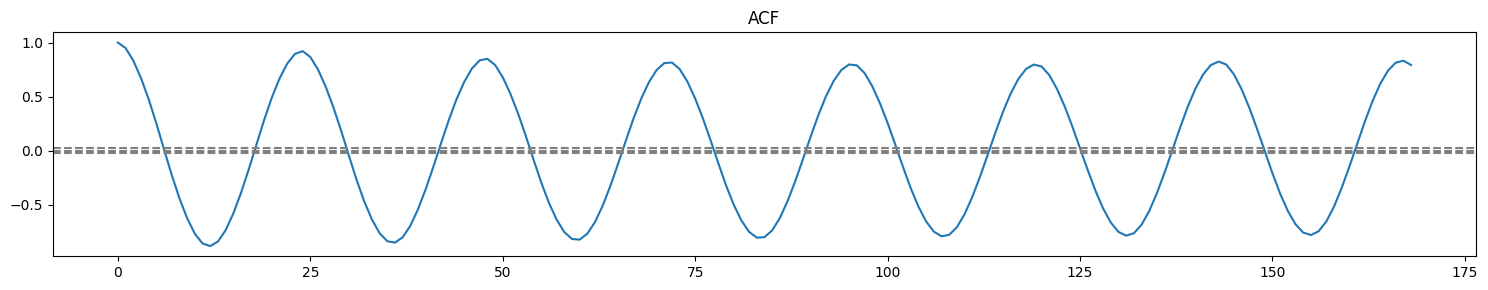

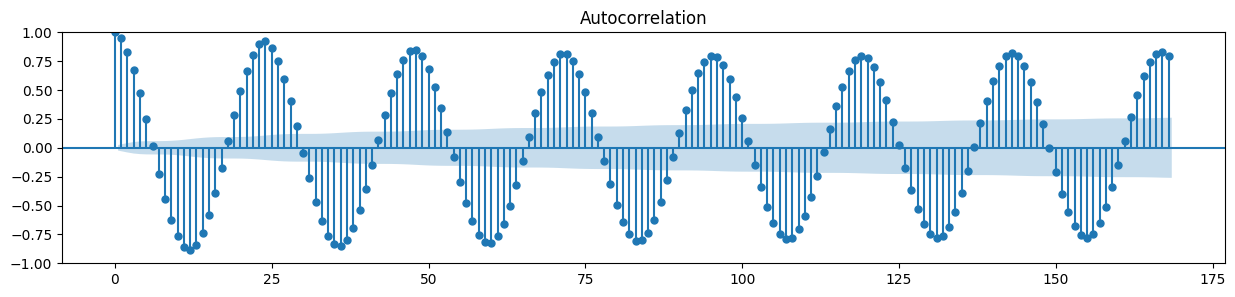

<Figure size 1500x300 with 0 Axes>

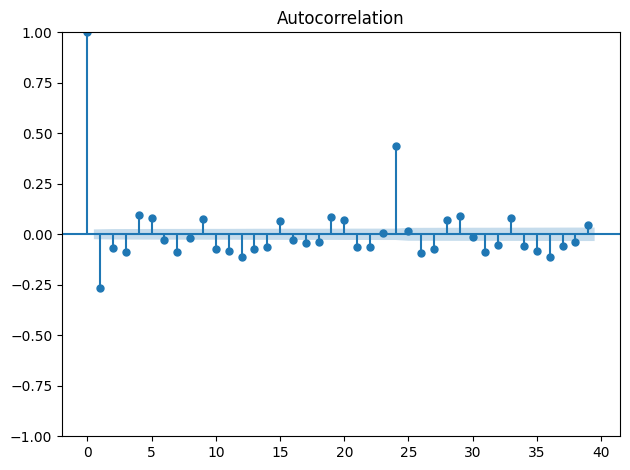

In [ ]:
#Plot ACF auto corrletion function
plt.figure(figsize=(15,3))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.title('ACF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_acf(ts_train, ax=plt.gca(),lags=lag)
plt.show()

plt.figure(figsize=(15,3))
plot_acf(ts_train.diff().diff().dropna())
plt.tight_layout()
plt.show()

from autocorrelation function graph, we can deduce q=3.


#### PACF

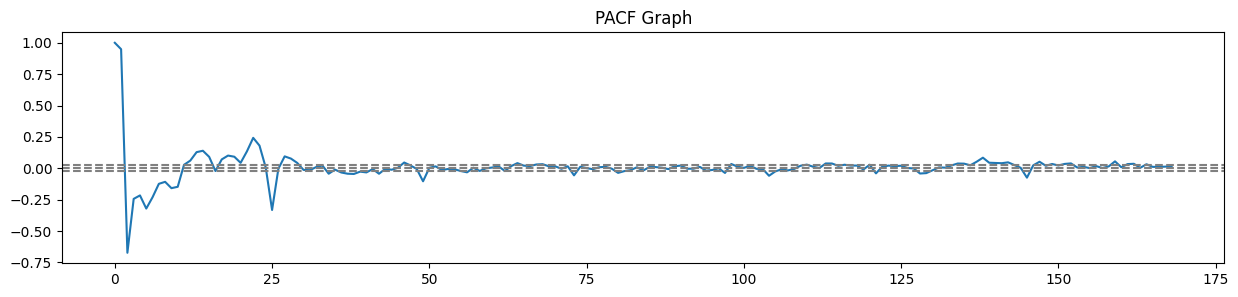

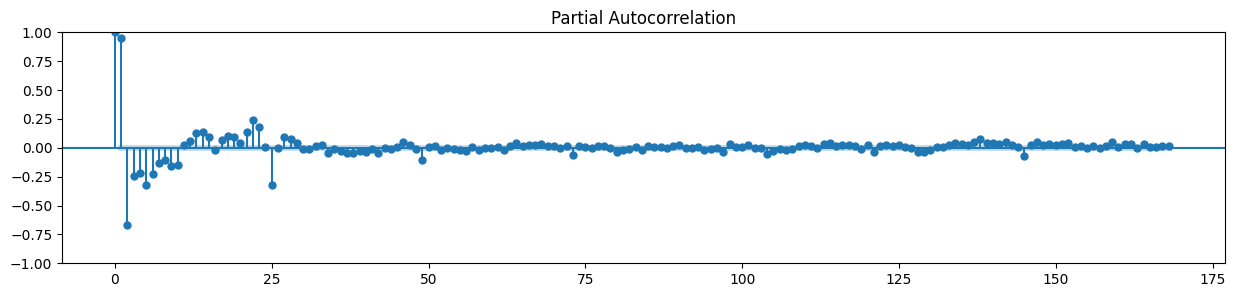

<Figure size 1500x300 with 0 Axes>

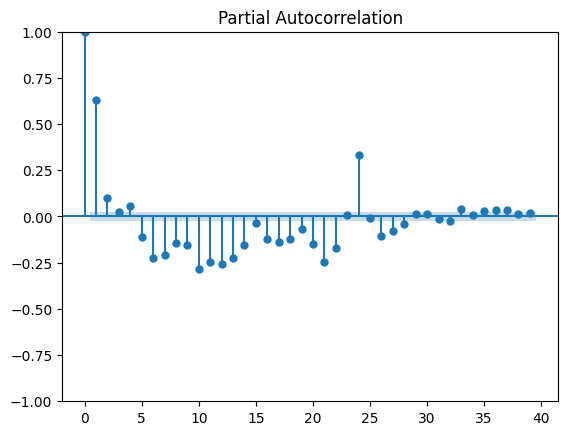

In [ ]:
#Plot PACF partial auto corrletion function
plt.figure(figsize=(15,3))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_train)),linestyle='--',color='gray')
plt.title('PACF Graph')
# plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_pacf(ts_train, ax=plt.gca(), lags=lag)
# plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3))
plot_pacf(ts_train.diff().dropna())
# plt.tight_layout()
plt.show()

from partial autocorrelation graph, we can deduce that p=1.

#### ARIMA Implementation

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


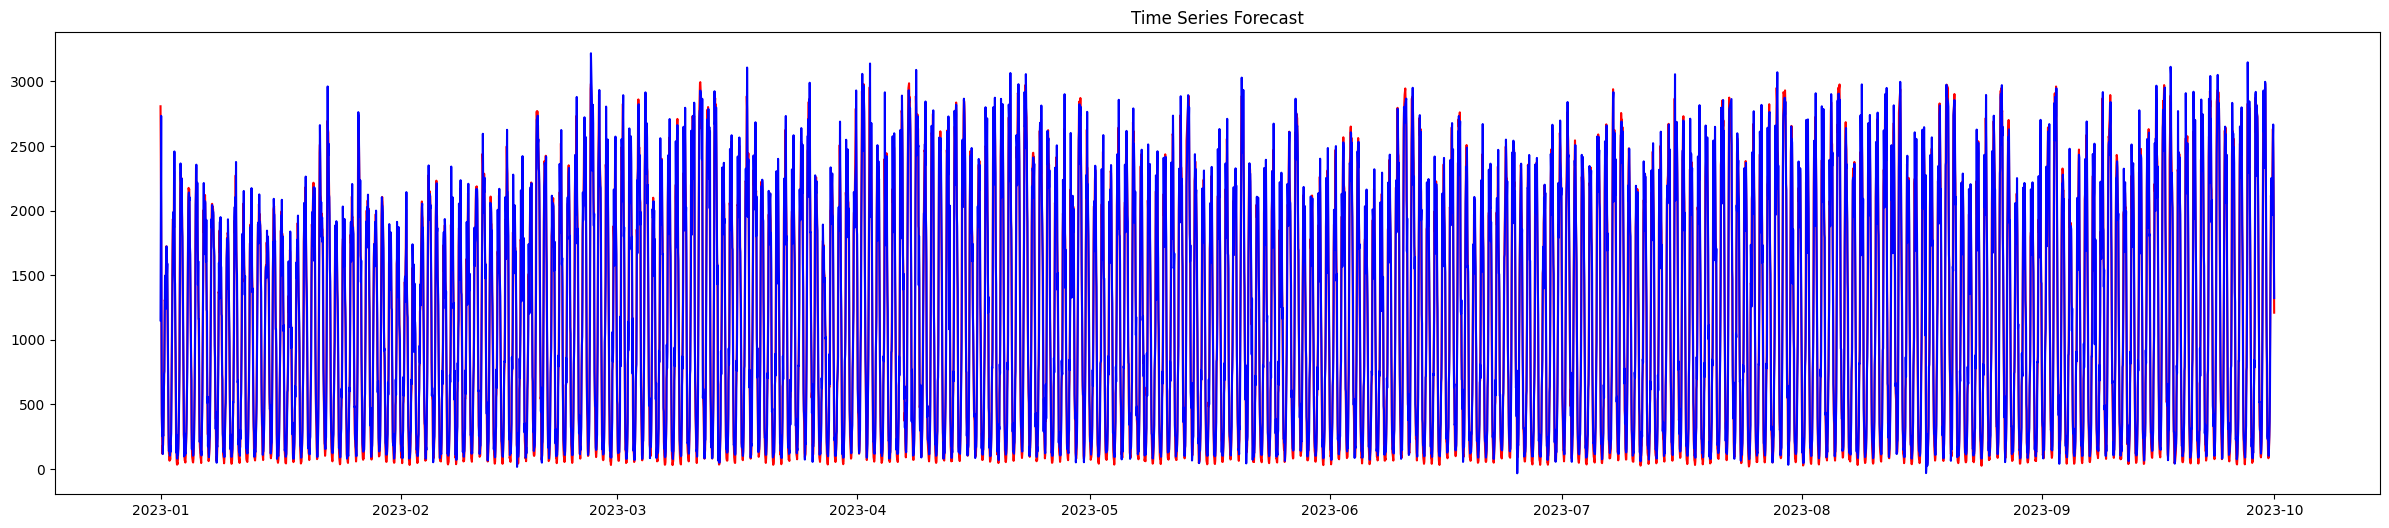

In [ ]:
d = 0 # No seasonal differences
p = 1 # From PACF Graph
q = 3 # From ACF Graph

model = ARIMA(ts_train , order = (p,d,q))
arima_results = model.fit()

plt.figure(figsize=[30,6])
plt.plot(ts_train , color='red')
plt.plot(arima_results.fittedvalues , color='blue')
plt.title("Time Series Forecast")
plt.show()

In [ ]:
RSS = sum((arima_results.fittedvalues).dropna()**2)
print("Residual Sum of Squares :",RSS )

Residual Sum of Squares : 13583440791.70172


#### ARIMA Summary

In [ ]:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Melbourne Central   No. Observations:                 6504
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -44286.631
Date:                Wed, 15 Nov 2023   AIC                          88585.262
Time:                        18:58:51   BIC                          88625.943
Sample:                             0   HQIC                         88599.332
                               - 6504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1150.5917     54.794     20.999      0.000    1043.198    1257.985
ar.L1          0.8621      0.010     88.719      0.000       0.843       0.881
ma.L1          0.6508      0.012     52.436      0.000       0.626       0.675
ma.L2          0.4368      0.014     30.670      0.000       0.409       0.465
ma.L3          0.1530      0.013     11.689      0.000       0.127       0.179
sigma2      4.805e+04    662.625     72.509      0.000    4.67e+04    4.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.45   Jarque-Bera (JB):               790.63
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Residual Plot

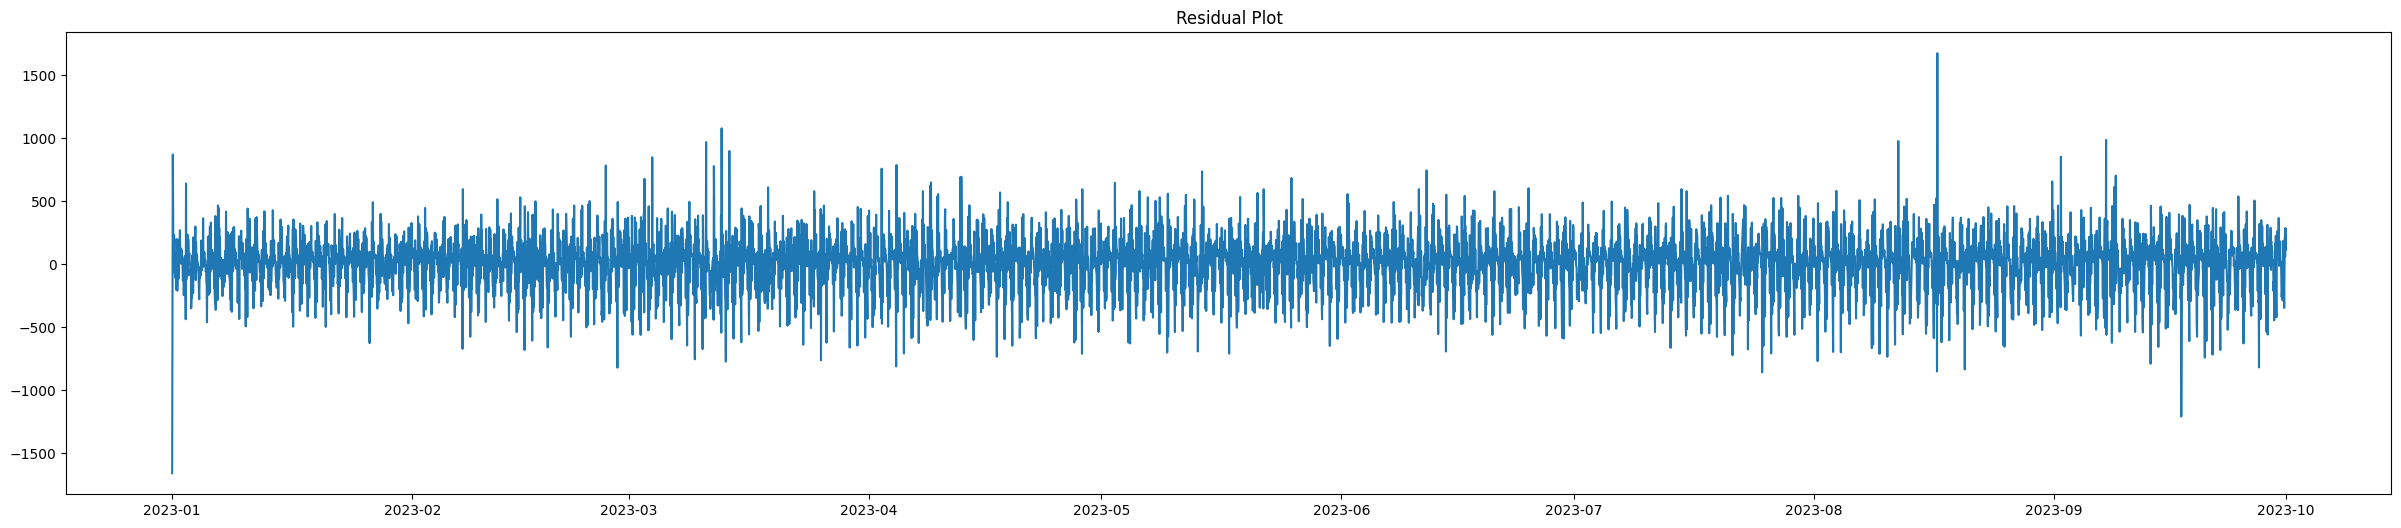

In [ ]:
x = pd.DataFrame(arima_results.fittedvalues)
x.columns = ['Melbourne Central']
temp = x['Melbourne Central'] - ts_train
plt.figure(figsize=[30,6])
plt.plot(temp)
# plt.plot(ts_train,color='black')
plt.title("Residual Plot")
plt.show()

## ARIMA on test data

In [ ]:
def ARIMA_prediction(value, p,d,q):
  model = ARIMA(value , order = (p,d,q))
  model_fit = model.fit()
  prediction = model_fit.forecast()[0]
  return prediction

In [ ]:
d = 0
p = 1
q = 2

Actual = [x for x in ts_train]
Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(ts_test)):
	ActualValue =  ts_test[timepoint]
	#forcast value
	Prediction = int(ARIMA_prediction(Actual, p,d,q)) # People Count can't be float
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

predictions=pd.DataFrame(Predictions).set_index(ts_test.index)

Actual=941.000000, Predicted=993.000000
Actual=683.000000, Predicted=878.000000
Actual=779.000000, Predicted=599.000000
Actual=327.000000, Predicted=859.000000
Actual=192.000000, Predicted=162.000000
Actual=86.000000, Predicted=129.000000
Actual=105.000000, Predicted=189.000000
Actual=139.000000, Predicted=156.000000
Actual=427.000000, Predicted=212.000000
Actual=700.000000, Predicted=630.000000
Actual=1151.000000, Predicted=867.000000
Actual=1668.000000, Predicted=1345.000000
Actual=1985.000000, Predicted=1903.000000
Actual=2042.000000, Predicted=2053.000000
Actual=2210.000000, Predicted=1963.000000
Actual=2413.000000, Predicted=2235.000000
Actual=2103.000000, Predicted=2465.000000
Actual=1975.000000, Predicted=1841.000000
Actual=2000.000000, Predicted=1835.000000
Actual=1784.000000, Predicted=2050.000000
Actual=1298.000000, Predicted=1610.000000
Actual=845.000000, Predicted=1000.000000
Actual=614.000000, Predicted=676.000000
Actual=285.000000, Predicted=582.000000
Actual=160.000000, 

In [ ]:
predictions.to_csv("Test_predictions.csv")

## Scoring our model

Defining Mean square error function

In [ ]:
predictions.columns = ['Melbourne Central']
predictions

,Melbourne Central
Date,
2023-10-01 00:00:00,993
2023-10-01 01:00:00,878
2023-10-01 03:00:00,599
2023-10-01 04:00:00,859
2023-10-01 05:00:00,162
...,...
2023-10-31 19:00:00,2157
2023-10-31 20:00:00,1882
2023-10-31 21:00:00,1696


In [ ]:
def mean_absolute_percentage_error(y_test,y_predict):
  return np.mean(np.abs((y_test-y_predict)/y_test)) *100

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print('Test Mean Absolute Error:', mean_absolute_error(ts_test, predictions))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(ts_test, predictions)))
print('Test Mean Absolute percentage Error:',mean_absolute_percentage_error(ts_test, predictions['Melbourne Central']))

Test Mean Absolute Error: 175.70041039671682
Test Root Mean Squared Error: 238.50015558361025
Test Mean Absolute percentage Error: 31.48036806422298


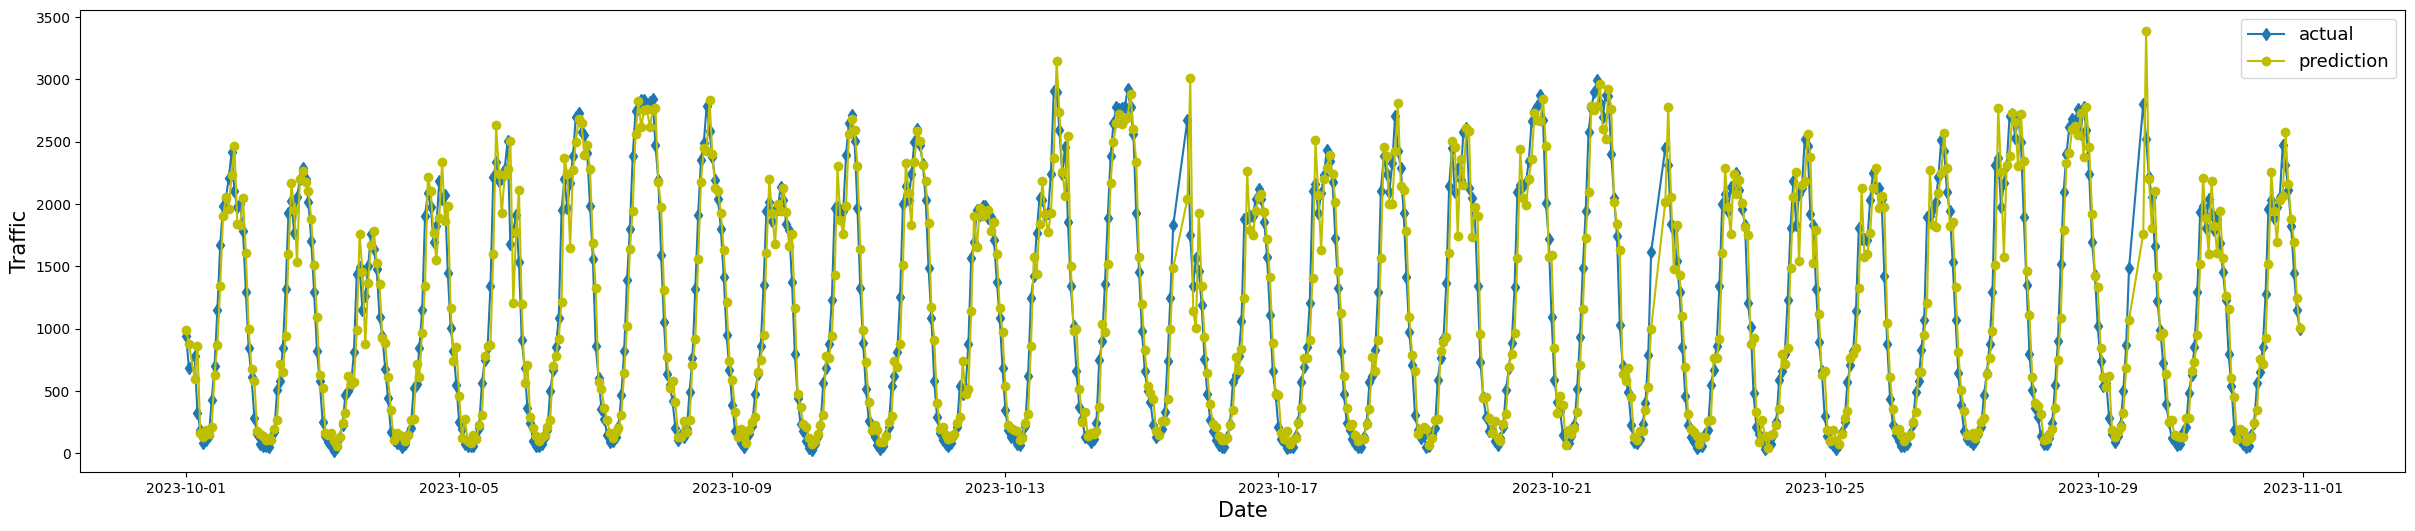

In [ ]:
# plot actual value vs predicted
plt.figure(figsize=(30,6))
plt.plot(ts_test.index, ts_test.values, marker='d', label="actual")
plt.plot(ts_test.index, predictions['Melbourne Central'],marker='o',color= 'y', label="prediction")
plt.ylabel('Traffic', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=13)
plt.show()